# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
# Load dataset 
df = pd.read_csv('data_YesBank_StockPrices.csv')  
df['Date'] = pd.to_datetime(df['Date'], format='%b-%d', errors='coerce') + pd.DateOffset(year=2023)
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
# Select relevant columns
df = df[['Open', 'High', 'Low', 'Close']]
df = df.dropna()

# Create new features
df['High_Low_Diff'] = df['High'] - df['Low']
df['Prev_Close'] = df['Close'].shift(1)
df = df.dropna()
df.describe()


,Open,High,Low,Close,High_Low_Diff,Prev_Close
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,106.040652,116.642065,95.390054,105.693152,21.252011,105.521304
std,98.915567,106.371098,91.269251,98.627411,23.480747,98.757785
min,10.000000,11.240000,5.550000,9.980000,1.000000,9.980000
25%,33.867500,36.320000,28.877500,33.495000,7.145000,33.070000
50%,62.990000,72.870000,58.210000,62.720000,13.575000,62.720000
75%,153.350000,170.092500,139.195000,153.617500,25.905000,153.617500
max,369.950000,404.000000,345.500000,367.900000,183.850000,367.900000


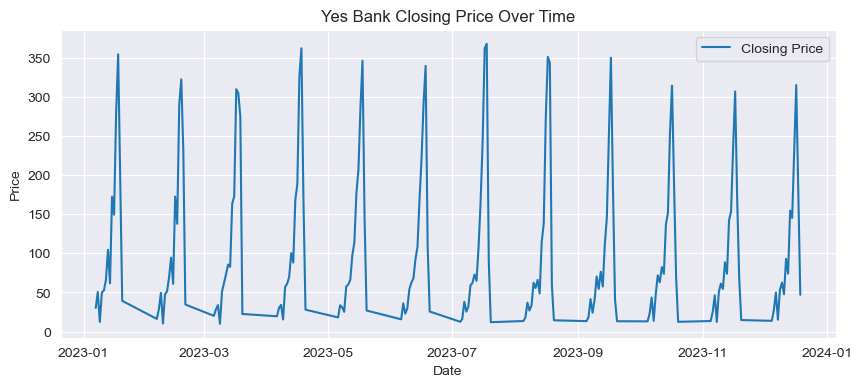

In [17]:
plt.figure(figsize=(10, 4))
plt.plot(df['Close'], label='Closing Price')
plt.title("Yes Bank Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Features and target
X = df[['Open', 'High', 'Low', 'High_Low_Diff', 'Prev_Close']]
y = df['Close']

# Time-based split (no shuffling)
split = int(len(df) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, lr_pred)))
print("Linear Regression R2:", r2_score(y_test, lr_pred))

Linear Regression RMSE: 8.617779407631406
Linear Regression R2: 0.9909131831590754


In [20]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, rf_pred)))
print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest RMSE: 10.577828440223914
Random Forest R2: 0.9863096652939279


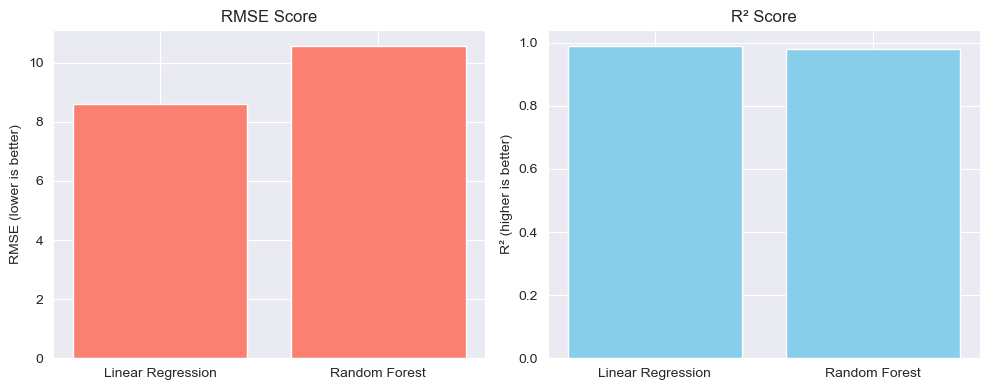

In [21]:
models = ['Linear Regression', 'Random Forest']
rmse_scores = [8.61, 10.57]  # Replace with your actual scores
r2_scores = [0.99, 0.98]

plt.figure(figsize=(10, 4))

# RMSE Bar Plot
plt.subplot(1, 2, 1)
plt.bar(models, rmse_scores, color='salmon')
plt.title("RMSE Score")
plt.ylabel("RMSE (lower is better)")

# R2 Bar Plot
plt.subplot(1, 2, 2)
plt.bar(models, r2_scores, color='skyblue')
plt.title("R² Score")
plt.ylabel("R² (higher is better)")

plt.tight_layout()
plt.show()


In [27]:
close_prices = df['Close']

In [28]:
diff_close = close_prices.diff().dropna()
adf_result = adfuller(diff_close)
print("Differenced ADF p-value:", adf_result[1])  


Differenced ADF p-value: 2.1103921684546807e-25


In [29]:
split = int(len(close_prices) * 0.8)
train = close_prices[:split]
test = close_prices[split:]


In [30]:
model = ARIMA(train, order=(2, 1, 2))  # You can tweak (p,d,q) based on your data
model_fit = model.fit()

# Forecast on test set
start = split
end = len(close_prices) - 1
predictions = model_fit.predict(start=start, end=end, typ="levels")

# Evaluate
rmse = np.sqrt(mean_squared_error(test, predictions))
r2 = r2_score(test, predictions)

print(f"ARIMA RMSE: {rmse}")
print(f"ARIMA R² Score: {r2}")

ARIMA RMSE: 76.2958611464914
ARIMA R² Score: 0.28776553306089314


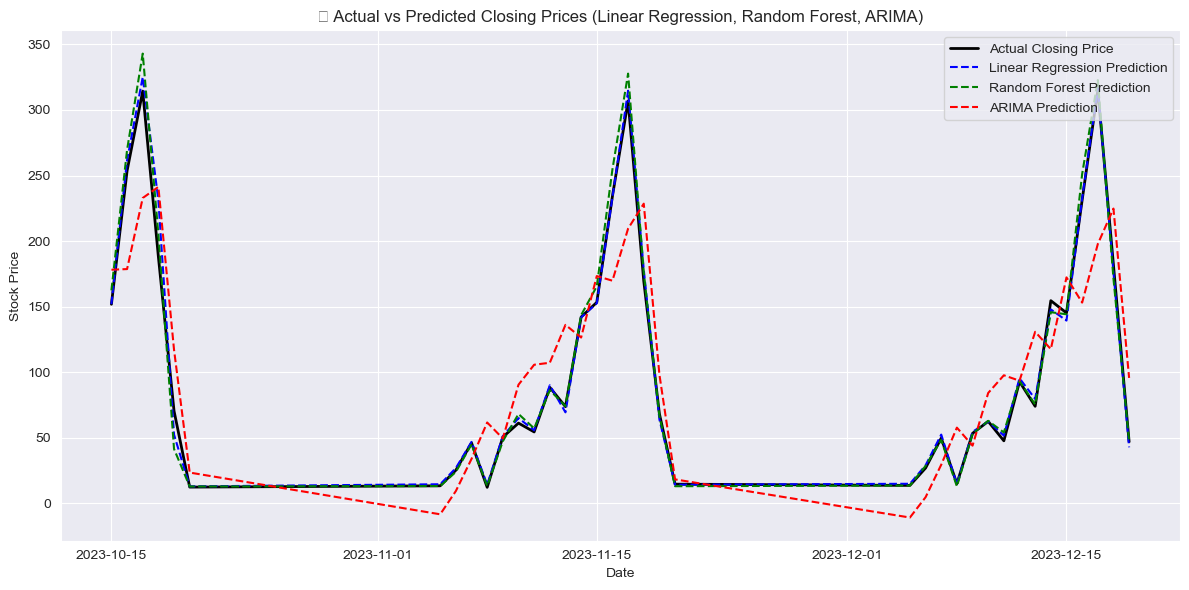

In [33]:
plt.figure(figsize=(12, 6))

# Actual
plt.plot(y_test.index, y_test, label='Actual Closing Price', color='black', linewidth=2)

# Linear Regression
plt.plot(y_test.index, lr_pred, label='Linear Regression Prediction', linestyle='--', color='blue')

# Random Forest
plt.plot(y_test.index, rf_pred, label='Random Forest Prediction', linestyle='--', color='green')

# ARIMA
plt.plot(y_test.index, arima_pred, label='ARIMA Prediction', linestyle='--', color='red')

plt.legend()
plt.title("📈 Actual vs Predicted Closing Prices (Linear Regression, Random Forest, ARIMA)")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.grid(True)
plt.tight_layout()
plt.show()
